# 神经网络学习笔记
## 0_1多层感知机
> 2019-04-Juni 佚之狗 https://github.com/HookeLiu QQ: 616471607
---

对于简单的线性可分问题, 比如像0_0示例的那样, 只需要一个神经元(感知机)即可完成. *为了做可视化以方便理解, 这里把"决策边界"转换成平面几何的表达方式, 但需要质疑的是, 神经网络并不会去处理一条线, 它处理的只是参数.*

* 像`与门`这样的功能, 是可以用单个感知机实现的, 因为如果把它表示在一个平面上的话可以找到一条"分界线"; 但是, 对于`异或`这样的问题就必须使用多个感知机来实现了. *(为了方便, 下面直接复制使用0_0中的内容了)*

In [1]:
import numpy as np             
import matplotlib.pyplot as plt 

def sigmoid(x):
    # f(x)=1/(1+e^-x), 求导:f'(x) = f(x) * (1 - f(x))
    return 1 / ( 1 + np.exp(-1*x) )
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

In [2]:
def neron(x, w, b):
    inp = np.dot(w, x) + b
    out = sigmoid(inp)
    return {'out':out, 'inSum':inp}

def loss_MSE(pred, lable):
    return np.mean( (lable - pred) ** 2  )

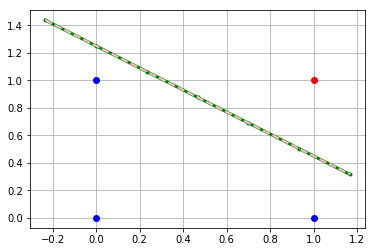

In [3]:
x = np.array([    # 假设把几个逻辑值表示在平面上, 目的是训练一个二输入与门
    [0,0],[0,1],
    [1,0],[1,1],
])
l = np.array([    
     0,  0,  
     0,  1, 
])
# 把数据绘制出来方便观察
plt.figure()
plt.grid(True)
for i in range( len(x) ):
    if l[i] == 1: 
        plt.plot(x[i][0], x[i][1], 'ro')
    else:
        plt.plot(x[i][0], x[i][1], 'bo') 
# 目测这么一条线可以划分
x_axis = np.arange(-0.233333, 1.33333, 0.233333)
deline = (0.25-1*0.16*x_axis)/0.2
lineN  = -0.8*x_axis+1.25
plt.plot(x_axis, deline, marker=".", linewidth=3, linestyle="-", color="green")
plt.plot(x_axis, lineN, marker=",", linewidth=2, linestyle="--", color="pink")
plt.show()

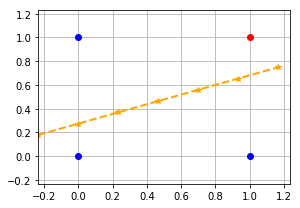

w → [-0.2887601   0.70887718]  b → -0.19437426729036872


In [4]:
# 随便设定一个初始值(初始化模型)
w = np.random.normal(0, 1 ,2)
b = np.random.normal(0, 0.1 )
# 可视化一下初始化之后的情况
plt.figure( figsize=(4.5, 3.2) ) # 比默认尺寸画得小一点(320*450)好观察变化
plt.xlim([-0.233,1.233])         # 固定坐标轴取消自动缩放, 以便对比
plt.ylim([-0.233,1.233])
plt.grid(True)
for i in range( len(x) ):
    if l[i] == 1: 
        plt.plot(x[i][0], x[i][1], 'ro')
    else:
        plt.plot(x[i][0], x[i][1], 'bo')
x_axis = np.arange(-0.233333, 1.33333, 0.233333)
deline = (-b-1*w[0]*x_axis)/w[1]
plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
plt.show()
print("w →", w, " b →", b)

In [5]:
def train(w, b, data, lable, epochs = 100, LR = 0.0616471607, inDebugMode = False):
    # LR, Learn Rate, 超参数_学习率, 选值通常很小, 根据程序员的经验和模型表现进行调试. 也常用随着LR随着epoch增加而减小的方法来改善收敛.
    predcs = np.zeros(np.shape(data)[0])                      # 记录模型对整个数据集的输出, 以便求总体平均误差
    select = -1                                               # 记录被错误分类数据的索引, 只针对分错的数据更新参数
    count  = 0
    status = -1
    for epoch in range(epochs):
        for idx in range( len(data) ):                        # 依次对数据集中的每一个数据迭代一次, 总共迭代len(data)*epoch次
            # 按照上述常规套路的4步中的后3步训练感知机
            otpt = neron(data[idx], w, b)                     # 输入数据预测结果
            Yout = otpt.get("out")
            pred = 1 if Yout > 0.5 else 0   
            loss = loss_MSE(Yout, lable[idx])                         
            if loss > 0.2:                                    # 根据误差判断是否需要训练
                select = idx
                # 误差过大: 尝试优化损失函数, 调整参数使其输出最小化
                    # 求梯度(因为损失函数的输入值是神经元的输出值, 所以连续可导, 使用链式求导法求神经元的参数): 
                    # ∂Loss/∂w = ∂loss/∂Yout * ∂Yout/∂inSum * ∂inSum/∂w = (0-2lable+2Yout) * deriv_sigmoid(inSum) * (x+0)
                            #  ≈ (Yout-lable) * deriv_sigmoid(inSum) * x (因为系数2只影响每次更新的步长, 所以认为成1方便计算)
                    # ∂Loss/∂b = ∂Loss/∂Yout * ∂Yout/∂inSum  * ∂Yout/∂b = 2(-lable+Yout) * deriv_sigmoid(inSum) * 1 
                            #  ≈ (Yout-lable)*deriv_sigmoid(inSum) (为了方便计算)
                inSum = otpt.get("inSum")
                dLoss_dW = (Yout-lable[select]) * deriv_sigmoid(inSum) * data[select]
                dLoss_dB = (Yout-lable[select]) * deriv_sigmoid(inSum) 
                #print("*----*debug:idx,data,Yout,pred,dLoss_dW,dLoss_dB",idx,data[select],Yout,pred,dLoss_dW,dLoss_dB)
                    # 梯度下降(更新参数)
                w -= LR * dLoss_dW
                b -= LR * dLoss_dB
                count += 1
        if select == -1:
            if (inDebugMode):
                print("INFO: 总计更新了%d次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序" %(cot) )
                status = 200
            else:
                print("INFO: 总计更新了%d次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序" %(count) )
                status = 200
            break                                            # 不存在误分点就不需要训练
            
        if epoch % 50 == 0:                                  # 每迭代50次输出当前状态并减小一点学习率
            for ds in range( len( data ) ) :
                predcs[ds] = 1 if neron(data[ds], w, b).get("out") > 0.5 else 0
            print( "迭代第%dCycle，Loss%.5f" %( epoch+1, loss_MSE(predcs, lable) ) ) 
            if LR > 0.008:
                LR -= 0.002426046106
        select = -1
    print( "本次训练对%d个Sample(s)共更新了%d次，共迭代%depochs" %( np.shape(data)[0], count, ( np.shape(data)[0] ) * (epoch+1) ) )
    return [w,b,LR,count,status]

迭代第1Cycle，Loss0.25000
迭代第51Cycle，Loss0.00000
INFO: 总计更新了164次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了164次，共迭代324epochs


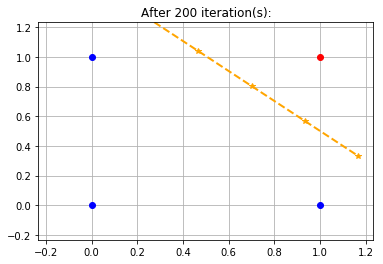

w → [0.44577759 0.44140064]  b → -0.6668897503657131


In [6]:
# 训练并可视化一下训练后的情况
parameters = train(w, b, x, l, 200, 0.12)
w, b = parameters[0], parameters[1]

plt.figure()
plt.xlim([-0.233,1.233])         # 固定坐标轴取消自动缩放, 以便对比
plt.ylim([-0.233,1.233])
plt.grid(True)
for i in range( len(x) ):
    if l[i] == 1: 
        plt.plot(x[i][0], x[i][1], 'ro')
    else:
        plt.plot(x[i][0], x[i][1], 'bo')
deline = (-1 * b -1 * w[0] * x_axis)/w[1]
plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
plt.title("After 200 iteration(s):") 
plt.show()
print("w →", w, " b →", b)

#### 可见, 根据0_0的经验, 单个感知机能很好地"学习成"一个"与门". 但是, 异或门不是线性可分的, 如果只用单个神经元的话, 永远也无法收敛.

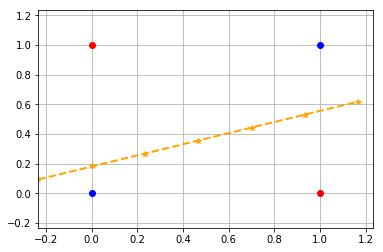

w → [ 0.43408702 -1.1590047 ]  b → 0.20923868709972676


In [7]:
x2 = np.array([    # 假设一个"异或"的关系
    [0,0],[0,1],
    [1,0],[1,1],
])
l2 = np.array([    
     0,  1,  
     1,  0, 
])
# 清除之前训练的结果, 重新初始化
w = np.random.normal(0, 1 ,2)
b = np.random.normal(0, 0.1 )
# 可视化一下新初始化之后的情况
plt.figure()
plt.xlim([-0.233,1.233])         # 固定坐标轴取消自动缩放, 以便对比
plt.ylim([-0.233,1.233])
plt.grid(True)
for i in range( len(x) ):
    if l2[i] == 1: 
        plt.plot(x2[i][0], x[i][1], 'ro')
    else:
        plt.plot(x2[i][0], x[i][1], 'bo')
x_axis = np.arange(-0.233333, 1.33333, 0.233333)
deline = (-b-1*w[0]*x_axis)/w[1]
plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
plt.show()
print("w →", w, " b →", b)

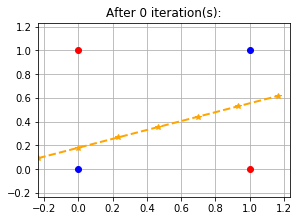

w → [ 0.43408702 -1.1590047 ]  b → 0.20923868709972676
迭代第1Cycle，Loss0.75000
本次训练对4个Sample(s)共更新了131次，共迭代200epochs


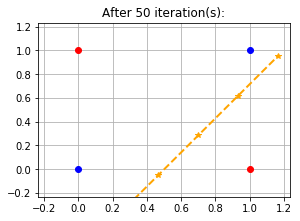

w → [ 0.44992601 -0.31319542]  b → -0.22576602836182103
迭代第1Cycle，Loss0.50000
本次训练对4个Sample(s)共更新了111次，共迭代200epochs


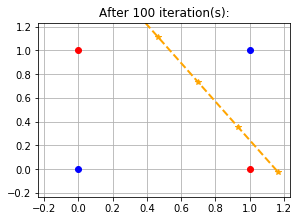

w → [0.37954301 0.23379508]  b → -0.4368310607230548
迭代第1Cycle，Loss0.00000
INFO: 总计更新了242次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了97次，共迭代164epochs


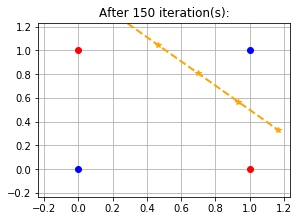

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


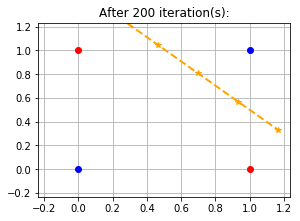

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


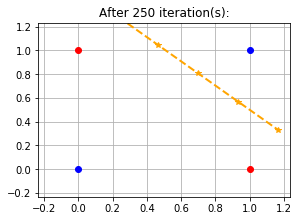

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


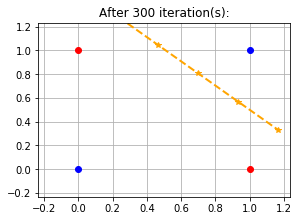

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


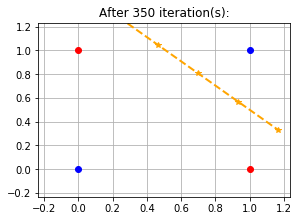

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


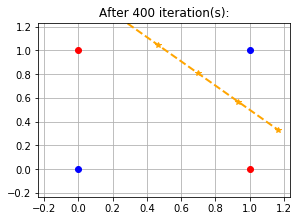

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


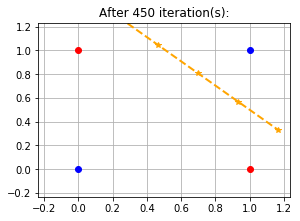

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


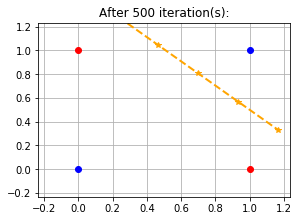

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


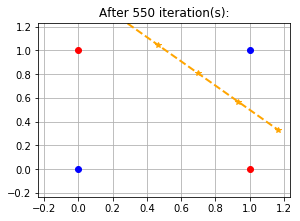

w → [0.44859851 0.43950896]  b → -0.6685456553493774
INFO: 总计更新了339次参数后, 所有数据的误差已经在可接受范围内, 跳出训练程序
本次训练对4个Sample(s)共更新了0次，共迭代4epochs


In [8]:
# 尝试训练"异或门", 并检查一下训练的成效
# 这里为了方便可视化观察效果, 所以每次训练只迭代50次, 每次训练画一个图像
cot = 0
LR  = 0.12
for ct in range(12):
    plt.figure( figsize=(4.5, 3.2) ) # 比默认尺寸画得小一点(320*450)好观察变化
    plt.grid(True)
    plt.xlim([-0.233,1.233])
    plt.ylim([-0.233,1.233])
    for i in range( len(x2) ):
        if l2[i] == 1: 
            plt.plot(x2[i][0], x2[i][1], 'ro')
        else:
            plt.plot(x2[i][0], x[i][1], 'bo')
    deline = (-1 * b + -1 * w[0] * x_axis)/w[1]
    plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
    plt.title("After "+ str(ct*50) +" iteration(s):") 
    plt.show()
    print("w →", w, " b →", b)
    
    parameters = train(w, b, x, l, 50, LR, True)
    w, b, LR = parameters[0], parameters[1], parameters[2]
    cot += parameters[3]

可以看到, 如果强行用单个神经元训练线性不可分的情况, 决策边界在可视化平面上的表现就是"跑来跑去", 也就是说**感知机无法表示异或问题, 所有的线性分类模型都无法处理异或分类问题**, 尝试拟合只会得到来回震荡无法收敛的情况.

也就是说, 一个神经元只能"画一条线" (当然, 这不准确, 只是为了方便表达和理解), 要想正确地处理异或问题, 需要"画两条线", 也就需要至少3个神经元(两个输入, 1个输出). 神经元越多也就可以"画出更复杂的边界", 所以把神经网络理解成"神经元的堆叠"也没什么毛病. 但神经元一旦"堆叠起来", 训练的时候就必须每个神经元都参与训练, 并且需要分层更新, 也就是说**非输出层的误差依赖于其下一层误差**, 这就是`反向传播(BP, Back Propagation)`, 是神经网络的基础.

初始化后, c1→ [array([0.59550566, 2.06659292]) 0] c2→ [array([-1.36961749,  1.03078767]) 0] c3→ [array([1.83476044, 0.99051603]) 0]


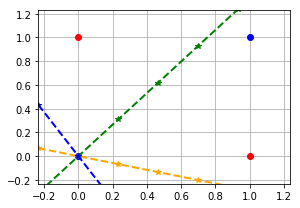

In [9]:
# 三个感知机有自己各自独立的参数(w,b), 学习的时候需要使用反向传播.
# 先随机初始化3组[w,b], 其中w是二维向量
c1 = np.array([ np.random.normal(0, 1 ,2), 0 ])
c2 = np.array([ np.random.normal(0, 1 ,2), 0 ])
c3 = np.array([ np.random.normal(0, 1 ,2), 0 ])
print("初始化后, c1→",c1,"c2→",c2,"c3→",c3)
# 可视化一下初始化的情况
plt.figure( figsize=(4.5, 3.2) )
plt.grid(True)
plt.xlim([-0.233,1.233])
plt.ylim([-0.233,1.233])
for i in range( len(x2) ):
    if l2[i] == 1: 
        plt.plot(x2[i][0], x2[i][1], 'ro')
    else:
        plt.plot(x2[i][0], x2[i][1], 'bo')

c1Line = -1 * (c1[0][0] * x_axis + c1[1]) / c1[0][1]
plt.plot(x_axis, c1Line, marker="*", linewidth=2, linestyle="--", color="orange")
c2Line = -1 * (c2[0][0] * x_axis + c2[1]) / c2[0][1]
plt.plot(x_axis, c2Line, marker="*", linewidth=2, linestyle="--", color="green")
c3Line = -1 * (c3[0][0] * x_axis + c3[1]) / c3[0][1]
plt.plot(x_axis, c3Line, marker="*", linewidth=2, linestyle="--", color="blue")
plt.show()

由前面的经验, 一个感知机会拟合出"一条线"来划分两类数据, 而这里用了三个感知机, 很容易想当然地认为成"前两个感知机画了两条决策边界, 后一个感知机来分类", 但实际上... 先按照之前的方法把三个感知机学习到的参数可视化一下:

训练后, c1→ [array([6.61067488, 3.47813849]) -0.38837807928605983] c2→ [array([-6.77265477,  2.24554041]) -1.706350028200151] c3→ [array([4.65878169, 3.81453727]) -4.6668067460706]


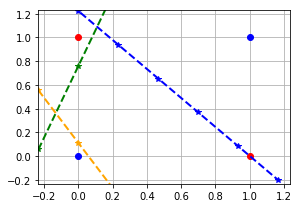

[0 0] → 0  (0.09992)
[0 1] → 1  (0.90012)
[1 0] → 0  (0.49588)
[1 1] → 0  (0.49979)


In [10]:
# 前馈传播, 后一层的每一个神经元依次接收前一层的每一个神经元的输出
# neron(x, w, b)
LR = 0.1
select = -1
for epoch in range(9999):
    for idx in range( len(x2) ):
        i1 = neron(x2[idx], c1[0], c1[1])
        i2 = neron(x2[idx], c2[0], c2[1])
        o1 = neron(np.array([i1.get("out"), i2.get("out")]), c3[0], c3[1])
        oism = o1.get("inSum")
        outp = o1.get("out")
        loss = loss_MSE(outp, l2[idx])                         
        if loss > 0.01: 
            select = idx
            # 反向传播也用求偏导的方法, 只不过参数分了层
            # 有一篇帖子讲得很好: https://www.cnblogs.com/charlotte77/p/5629865.html
            # 输出层: ∂Loss/∂c3w =   ∂loss/∂o1.out * ∂o1.out/∂o1.inSum * ∂o1.inSum/∂c3w = (0-2lable+2o1) * deriv_sigmoid(o1.inSum) * (i1.out+i2.out)
            # 输入层: ∂Loss/∂c?w = ( ∂Loss/∂o1.out * ∂o1.out/∂o1.inSum * ∂o1.inSum/∂∑in.out) * ∂∑in.out/∂i?.inSum * ∂i?.inSum/∂c?w
            dLoss_dOut = (outp - l2[select])
            dOut_dOism = deriv_sigmoid(oism)
            dLoss_dc3W =   dLoss_dOut * dOut_dOism * (i1.get("out")+i2.get("out"))
            dLoss_dc2W = ( dLoss_dOut * dOut_dOism * c3[0] ) * deriv_sigmoid(i2.get("inSum")) * x[select]
            dLoss_dc1W = ( dLoss_dOut * dOut_dOism * c3[0] ) * deriv_sigmoid(i1.get("inSum")) * x[select]
            dLoss_dc3B =   dLoss_dOut * dOut_dOism
            dLoss_dc2B = ( dLoss_dOut * dOut_dOism ) * deriv_sigmoid(i2.get("inSum"))
            dLoss_dc1B = ( dLoss_dOut * dOut_dOism ) * deriv_sigmoid(i1.get("inSum"))
            # 梯度下降(更新参数)
            c1[0] -= LR * dLoss_dc1W
            c2[0] -= LR * dLoss_dc2W
            c3[0] -= LR * dLoss_dc3W
            c1[1] -= LR * dLoss_dc1B
            c2[1] -= LR * dLoss_dc2B
            c3[1] -= LR * dLoss_dc3B
    if select == -1:    
        print( "*在迭代%d次之后, 误差可接受, 跳出训练*" %(epoch + 1) )
        break
    select = -1
        
print("训练后, c1→",c1,"c2→",c2,"c3→",c3)
plt.figure( figsize=(4.5, 3.2) )
plt.grid(True)
plt.xlim([-0.233,1.233])
plt.ylim([-0.233,1.233])
for i in range( len(x2) ):
    if l2[i] == 1: 
        plt.plot(x2[i][0], x2[i][1], 'ro')
    else:
        plt.plot(x2[i][0], x2[i][1], 'bo')

c1Line = -1 * (c1[0][0] * x_axis + c1[1]) / c1[0][1]
plt.plot(x_axis, c1Line, marker="*", linewidth=2, linestyle="--", color="orange")
c2Line = -1 * (c2[0][0] * x_axis + c2[1]) / c2[0][1]
plt.plot(x_axis, c2Line, marker="*", linewidth=2, linestyle="--", color="green")
c3Line = -1 * (c3[0][0] * x_axis + c3[1]) / c3[0][1]
plt.plot(x_axis, c3Line, marker="*", linewidth=2, linestyle="--", color="blue")
plt.show()

for item in x2:
    i1 = neron(item, c1[0], c1[1])
    i2 = neron(item, c2[0], c2[1])
    o1 = neron(np.array([i1.get("out"), i2.get("out")]), c3[0], c3[1])
    print( item, "→", 1 if o1.get("out") > 0.5 else 0, " (%.5f)" %(o1.get("out")) )